## Required

In [1]:
!pip install python-chess
!pip install cairosvg

## Imports

In [2]:
import random
import chess
import chess.svg
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
import cairosvg

## Constants

In [3]:
N = 8
population_size = 100
generations = 1000

## Individuals

In [4]:
class Individual:
    def __init__(self, genotype=None):
        self.genotype = genotype if genotype else random.sample(range(N), N)
        self.fitness = calculate_fitness(self.genotype)

## Fitness

In [5]:
def calculate_fitness(genotype):
    """Calculate the fitness by counting the number of conflicts (penalties)"""
    penalty = 0
    for i in range(N):
        for j in range(i + 1, N):
            # Checking for queens in the same diagonal
            if abs(genotype[i] - genotype[j]) == j - i:
                penalty += 1
    return penalty


## operators

In [6]:
def mutate(individual):
    """Random swap mutation: swap two genes"""
    a, b = random.sample(range(N), 2)
    individual.genotype[a], individual.genotype[b] = individual.genotype[b], individual.genotype[a]
    individual.fitness = calculate_fitness(individual.genotype)


In [7]:

def crossover(parent1, parent2):
    """Single point crossover"""
    point = random.randint(1, N - 1)
    child_genotype = parent1.genotype[:point] + parent2.genotype[point:]
    return Individual(child_genotype)


In [8]:
## selection

In [9]:

def select_parents(population):
    """Select best 2 parents from 5 random individuals"""
    selected = random.sample(population, 5)
    selected.sort(key=lambda x: x.fitness)
    return selected[:2]

def replace_weakest(population, child):
    """Replace the weakest individual with the child if child is better"""
    population.sort(key=lambda x: x.fitness, reverse=True)
    for i in range(population_size):
        if population[i].fitness > child.fitness:
            population[i] = child
            break


## other methods

In [10]:

def save_chessboard_svg(genotype, filename="8_queen_solution.svg"):
    """Use python-chess to save the board configuration as SVG"""
    board = chess.Board()
    board.clear()  # Clear the default chess pieces
    
    # Place queens on the board
    for row, col in enumerate(genotype):
        square = chess.square(col, N - 1 - row)  # N - 1 - row for correct orientation
        board.set_piece_at(square, chess.Piece(chess.QUEEN, chess.WHITE))
    
    # Save the board as an SVG file
    with open(filename, "w") as f:
        f.write(chess.svg.board(board))

def plot_fitness_evolution(fitness_history):
    """Plot the fitness evolution over generations"""
    plt.plot(fitness_history)
    plt.title("Fitness Over Generations")
    plt.xlabel("Generation")
    plt.ylabel("Fitness (Penalty)")
    plt.show()


In [21]:
def sample_population(population, n):
    """Randomly sample n individuals from the population."""
    return random.sample(population, n)

In [19]:
def plot_multiple_chessboards(population, sample_size=5):
    """Plot n chess boards in a grid, sampling from the population"""
    sampled_individuals = sample_population(population, sample_size)
    
    fig, axs = plt.subplots(1, sample_size, figsize=(15, 3))  # Create a 1xN grid for chess boards
    
    for i, individual in enumerate(sampled_individuals):
        svg_data = generate_chessboard_svg(individual.genotype)
        png_image = cairosvg.svg2png(bytestring=svg_data)
        image_stream = BytesIO(png_image)
        img = plt.imread(image_stream, format='png')
        
        axs[i].imshow(img)
        axs[i].axis('off')  # Hide axis for each board
        axs[i].set_title(f"Fitness: {individual.fitness}")
    
    plt.show()


In [15]:
def generate_chessboard_svg(genotype):
    """Generate an SVG image of the chess board with queens"""
    board = chess.Board()
    board.clear()
    
    # Place queens on the board
    for row, col in enumerate(genotype):
        square = chess.square(col, N - 1 - row)  # Adjust for correct board orientation
        board.set_piece_at(square, chess.Piece(chess.QUEEN, chess.WHITE))
    
    return chess.svg.board(board)


## main

In [17]:
# Initialize population
fitness_history = []
population = [Individual() for _ in range(population_size)]


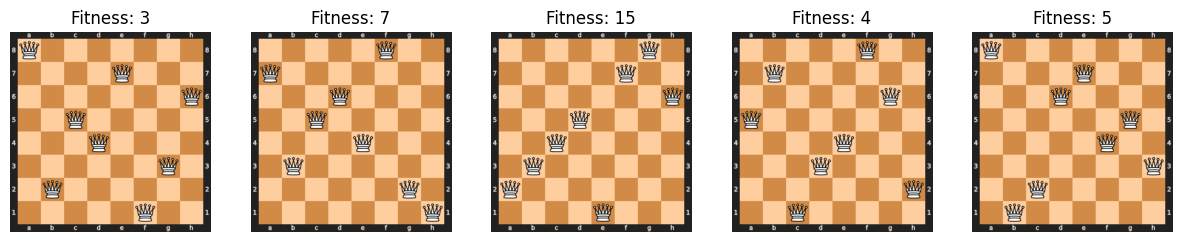

In [22]:
plot_multiple_chessboards(population, 5)

Solution found at generation 0


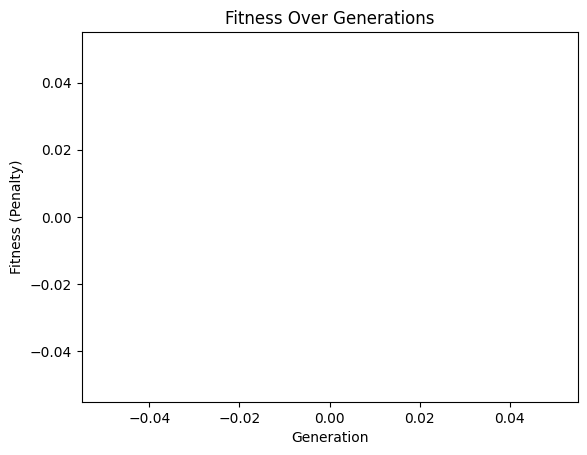

In [23]:
for gen in range(generations):
    # Select parents
    parent1, parent2 = select_parents(population)
    
    # Create child through crossover
    child = crossover(parent1, parent2)
    
    # Mutate the child
    if random.random() < 0.1:  # Mutation probability
        mutate(child)
    
    # Replace weakest individual with the child if it's better
    replace_weakest(population, child)
    
    # Record the fitness of the best individual
    best_individual = min(population, key=lambda x: x.fitness)
    fitness_history.append(best_individual.fitness)

    # Stop if solution is found
    if best_individual.fitness == 0:
        print(f"Solution found at generation {gen}")
        break

# Plot fitness evolution
plot_fitness_evolution(fitness_history)

# Save best board configuration as SVG
best_individual = min(population, key=lambda x: x.fitness)

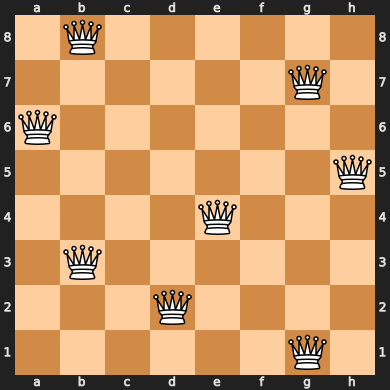

In [24]:
generate_chessboard_svg(best_individual.genotype)
